In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 4.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=6f524d5aabd371df79fc988275f5b762525fd60ff776625dc9266025d8b2263c
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


#### Rate Limitation

There’re some limitations by making the call to Yahoo Finance API:

- Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).

I’m not sure it’s precisely for Financial data. But please use time.sleep(1) to avoid your IP getting blocked.

In [ ]:
import yfinance as yf

In [ ]:
stocks = yf.Tickers('MSFT AAPL GOOG AMZN TSLA NFLX BA NVDA')
# ^ returns a named tuple of Ticker objects

# # access each ticker using (example)
stocks.tickers.MSFT.info

{'52WeekChange': 0.5708734,
 'SandP52WeekChange': 0.14383554,
 'address1': 'One Microsoft Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 217.2,
 'askSize': 800,
 'averageDailyVolume10Day': 28207800,
 'averageVolume': 33745089,
 'averageVolume10days': 28207800,
 'beta': 0.923331,
 'beta3Year': None,
 'bid': 217,
 'bidSize': 900,
 'bookValue': 15.626,
 'category': None,
 'circulatingSupply': None,
 'city': 'Redmond',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'dateShortInterest': 1601424000,
 'dayHigh': 222.3,
 'dayLow': 213.72,
 'dividendRate': 2.24,
 'dividendYield': 0.0105,
 'earningsQuarterlyGrowth': -0.151,
 'enterpriseToEbitda': 24.008,
 'enterpriseToRevenue': 10.955,
 'enterpriseValue': 1566760632320,
 'exDividendDate': 1605657600,
 'exchange': 'NMS',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'expireDate': None,
 'fiftyDayAverage': 211.43715,
 'fiftyTwoWee

In [ ]:
stock = stocks.tickers.NFLX
# stock = stocks.tickers.TSLA

stock.actions

,Dividends,Stock Splits
Date,,
2004-02-12,0.0,2.0
2015-07-15,0.0,7.0


In [ ]:
stock_name = stock.info['shortName']
stock_name

'Netflix, Inc.'

In [ ]:
# show analysts recommendations
stock.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-04-24 07:05:00,Canaccord Genuity,Sell,,main
2012-04-24 07:22:00,Goldman Sachs,Neutral,,main
2012-04-24 10:14:00,Dougherty,Neutral,,main
2012-05-31 06:33:00,Bank oferica,Underperform,,main
2012-07-25 05:32:00,PiperJaffray,Neutral,Overweight,down
...,...,...,...,...
2020-10-07 14:52:26,Pivotal Research,Buy,,main
2020-10-15 10:27:32,KeyBanc,Overweight,,main
2020-10-15 16:13:26,Canaccord Genuity,Buy,,main


In [ ]:
# show next event (earnings, etc)
stock.calendar

,Value
Earnings Date,2020-10-20 00:00:00
Earnings Average,2.13
Earnings Low,1.82
Earnings High,2.3
Revenue Average,6379370000
Revenue Low,6281000000
Revenue High,6593000000


In [ ]:
hist = stock.history(period='max')
# hist = yf.download("ES=F", period='max')
# stock_name = 'E-Mini S&P 500 Sep 20 (ES=F)'

In [ ]:
hist.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,104790000,0,0.0
2002-05-24,1.214286,1.225000,1.197143,1.210000,11104800,0,0.0
2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400,0,0.0


In [ ]:
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-10-13,540.559998,557.650024,537.200012,554.090027,5602500,0,0.0
2020-10-14,562.609985,572.489990,541.000000,541.450012,9510100,0,0.0
2020-10-15,545.520020,551.219971,535.099976,541.940002,5113100,0,0.0
2020-10-16,549.500000,554.330017,530.030029,530.789978,6347400,0,0.0
2020-10-19,537.070007,541.799988,525.380005,530.719971,7549000,0,0.0


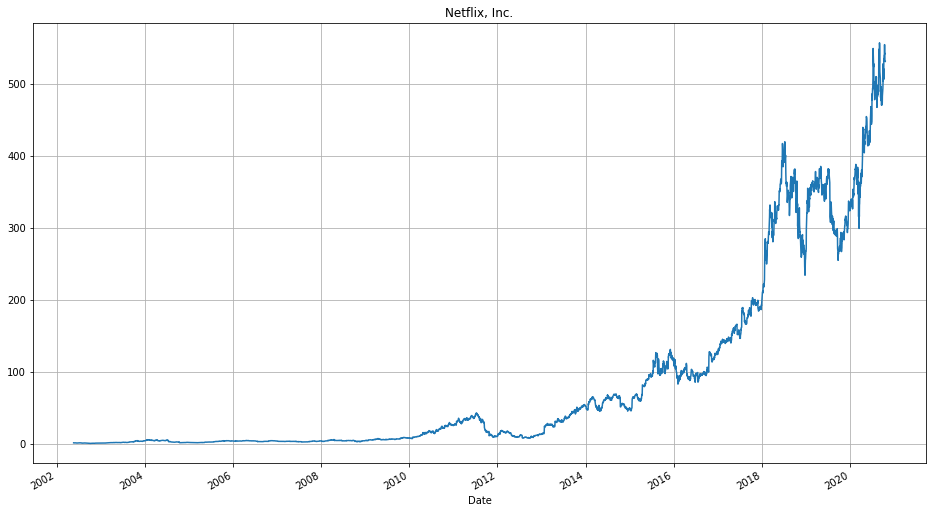

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot everything by leveraging the very powerful matplotlib package
hist['Close'].plot(figsize=(16, 9))
plt.title(stock_name)
plt.grid();

## RNN (Recurrent Neural Network) model of GRU to predict stock prices

Let's prepare data.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
price = hist.loc['2020':][['Close']]#.iloc[:-29]

price.head(3)

,Close
Date,
2020-01-02,329.809998
2020-01-03,325.899994
2020-01-06,335.829987


In [ ]:
price.tail(3)

,Close
Date,
2020-10-15,541.940002
2020-10-16,530.789978
2020-10-19,530.719971


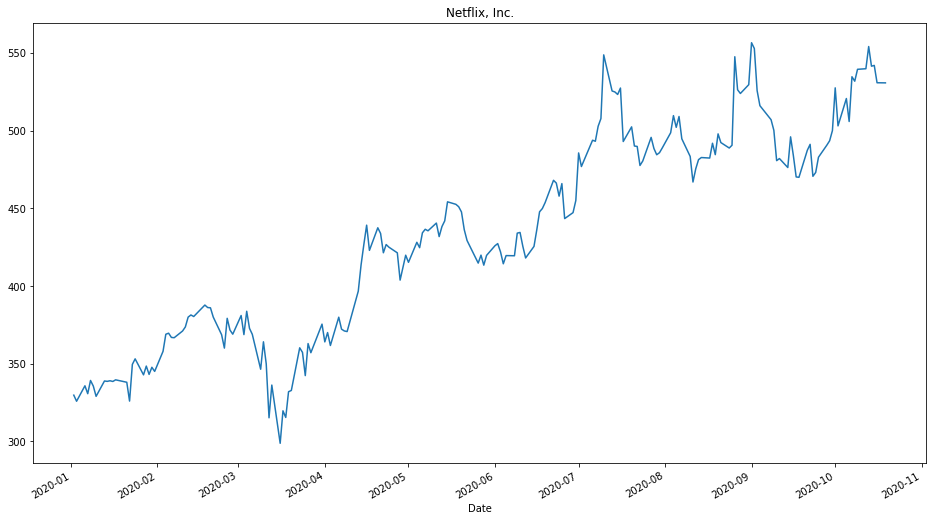

In [ ]:
# price['Close'] = 20 * np.sin(np.linspace(-10*np.pi, 10*np.pi, price.shape[0])) + 500
# price['Close'] = np.exp(np.linspace(1, 15, price.shape[0])) + 500
price['Close'].plot(figsize=(16, 9))
plt.title(stock_name);

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price['Close'] = scaler.fit_transform(price['Close'].to_numpy().reshape(-1, 1))
price.head(2)

,Close
Date,
2020-01-02,-0.759652
2020-01-03,-0.789997


In [ ]:
# from sklearn.model_selection import train_test_split

data_raw = price.to_numpy()
data = []

lookback = 20

# Create all possible sequences of length lookback.
for idx in range(len(data_raw) - lookback+1):
    data.append(data_raw[idx: idx + lookback])

data = np.array(data)


# test_set_size = int(0.15 * data.shape[0])
test_set_size = 5
train_set_size = data.shape[0] - test_set_size

X_train = data[:train_set_size, :-1]
y_train = data[:train_set_size, -1]
# # delta:
# y_train = np.sign(data[:train_set_size, -1] - data[:train_set_size, -2])

X_test = data[train_set_size:, :-1]
y_test = data[train_set_size:, -1]
# # delta:
# y_test = np.sign(data[train_set_size:, -1] - data[train_set_size:, -2])

print(price.shape, data.shape)
print(X_train.shape, X_test.shape)
X_train

(202, 1) (183, 20, 1)
(178, 19, 1) (5, 19, 1)


array([[[-0.7596523 ],
        [-0.78999652],
        [-0.71293321],
        ...,
        [-0.6582204 ],
        [-0.6144504 ],
        [-0.65604743]],

       [[-0.78999652],
        [-0.71293321],
        [-0.75235726],
        ...,
        [-0.6144504 ],
        [-0.65604743],
        [-0.6205037 ]],

       [[-0.71293321],
        [-0.75235726],
        [-0.68631396],
        ...,
        [-0.65604743],
        [-0.6205037 ],
        [-0.64106941]],

       ...,

       [[ 0.42167559],
        [ 0.37689666],
        [ 0.53001436],
        ...,
        [ 0.72139254],
        [ 0.60668973],
        [ 0.83011901]],

       [[ 0.37689666],
        [ 0.53001436],
        [ 0.4358775 ],
        ...,
        [ 0.60668973],
        [ 0.83011901],
        [ 0.80784595]],

       [[ 0.53001436],
        [ 0.4358775 ],
        [ 0.32986707],
        ...,
        [ 0.83011901],
        [ 0.80784595],
        [ 0.8672152 ]]])

In [ ]:
print(y_train.shape)
y_train[:3]

(178, 1)


array([[-0.6205037 ],
       [-0.64106941],
       [-0.54087924]])

In [ ]:
print(y_test.shape)
y_test[-3:]

(5, 1)


array([[0.88661685],
       [0.80008528],
       [0.79954198]])

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler_X_train = MinMaxScaler(feature_range=(-1, 1))
# scaler_X_test = MinMaxScaler(feature_range=(-1, 1))

# # fit_transform for every part as we have different scales.
# X_train_scaled = scaler_X_train.fit_transform(X_train.reshape(-1, X_train.shape[1]))
# X_test_scaled = scaler_X_test.fit_transform(X_test.reshape(-1, X_test.shape[1]))
# X_train_scaled[0]

In [ ]:
import torch
from torch import nn

# X_train_t = torch.Tensor(X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
# X_test_t = torch.Tensor(X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
X_train_t = torch.Tensor(X_train)
X_test_t = torch.Tensor(X_test)
y_train_t = torch.Tensor(y_train)
y_test_t = torch.Tensor(y_test)

X_train_t[:1]

tensor([[[-0.7597],
         [-0.7900],
         [-0.7129],
         [-0.7524],
         [-0.6863],
         [-0.7143],
         [-0.7656],
         [-0.6890],
         [-0.6907],
         [-0.6878],
         [-0.6913],
         [-0.6831],
         [-0.6952],
         [-0.7892],
         [-0.6061],
         [-0.5784],
         [-0.6582],
         [-0.6145],
         [-0.6560]]])

In [ ]:
y_train_t[:3]

tensor([[-0.6205],
        [-0.6411],
        [-0.5409]])

In [ ]:
input_dim = 1
hidden_dim = 200
num_layers = 2
output_dim = 1

## Gated recurrent units (GRU) neural net

In [ ]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [ ]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

# MSELoss() creates a criterion that measures the mean squared error (squared L2 norm) between each element in the input x and target y.
# criterion = torch.nn.MSELoss(reduction='mean')
# L1Loss() creates a criterion that measures the mean absolute error (MAE) between each element in the input x and target y.
# criterion = torch.nn.L1Loss()
# SmoothL1Loss() creates a criterion that uses a squared term if the absolute element-wise error falls below 1 and an L1 term otherwise.
criterion = torch.nn.SmoothL1Loss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
%%time
num_epochs = 200

scores = []
for epoch in range(num_epochs):
    preds = model(X_train_t)

    loss = criterion(preds, y_train_t)
    if (epoch+1)%10 == 0 or epoch in [0, num_epochs-1]:
        print('Epoch', epoch+1, 'loss:', loss.item())    
    scores.append(loss.item())

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch 1 loss: 0.10741343349218369
Epoch 10 loss: 0.023342052474617958
Epoch 20 loss: 0.012462150305509567
Epoch 30 loss: 0.006065368186682463
Epoch 40 loss: 0.004749901592731476
Epoch 50 loss: 0.004269239492714405
Epoch 60 loss: 0.0041314344853162766
Epoch 70 loss: 0.003947525750845671
Epoch 80 loss: 0.0037860258016735315
Epoch 90 loss: 0.004036435857415199
Epoch 100 loss: 0.00350583135150373
Epoch 110 loss: 0.0033144766930490732
Epoch 120 loss: 0.0033415642101317644
Epoch 130 loss: 0.003336399095132947
Epoch 140 loss: 0.0032274113036692142
Epoch 150 loss: 0.003021766198799014
Epoch 160 loss: 0.0028456442523747683
Epoch 170 loss: 0.004152876324951649
Epoch 180 loss: 0.0033384612761437893
Epoch 190 loss: 0.002877911552786827
Epoch 200 loss: 0.002386669861152768
CPU times: user 41.5 s, sys: 417 ms, total: 42 s
Wall time: 42.4 s


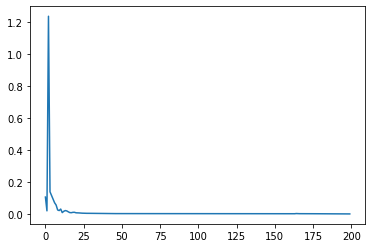

In [ ]:
sns.lineplot(x=range(len(scores)), y=scores)

In [ ]:
preds_train = scaler.inverse_transform(preds.detach().numpy()).squeeze()
# preds_train = preds.detach().numpy().squeeze()
preds_train[:3]

array([353.4829 , 355.8256 , 352.53918], dtype=float32)

In [ ]:
# make predictions
preds_test = model(X_test_t)
preds_test[:3]

tensor([[0.8401],
        [0.8837],
        [0.7465]], grad_fn=<SliceBackward>)

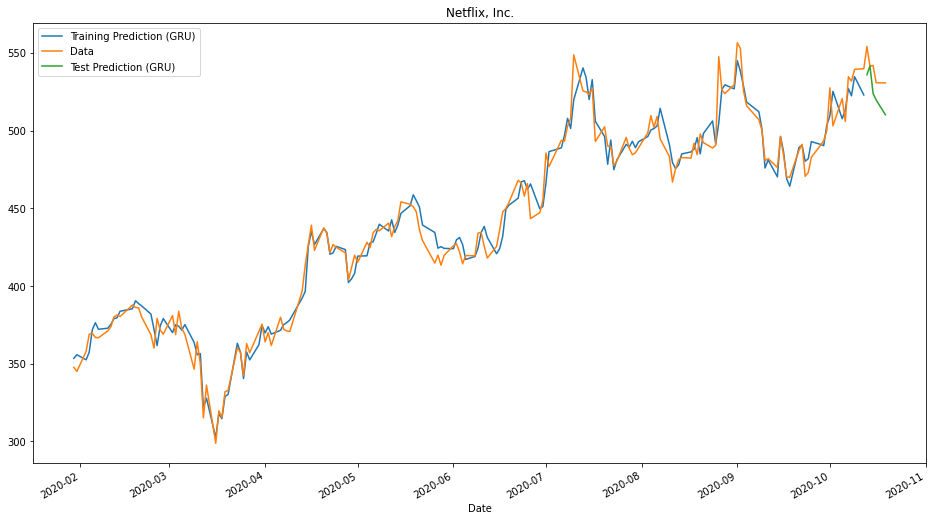

In [ ]:
train_df = pd.DataFrame({'Training Prediction (GRU)': preds_train,
                         'Data': scaler.inverse_transform(y_train).squeeze()},
                        index=price.iloc[lookback-1 : X_train.shape[0]+lookback-1].index)

result = pd.concat([train_df,
                    pd.DataFrame({'Data': scaler.inverse_transform(y_test).squeeze()},
                                 index=price.iloc[X_train.shape[0]+lookback-1 : ].index)])

train_n_test = result.join(pd.DataFrame({'Test Prediction (GRU)': scaler.inverse_transform(preds_test.detach().numpy()).squeeze()},
                                        index=price.iloc[X_train.shape[0]+lookback-1 : ].index))
train_n_test.plot(figsize=(16, 9), title=stock_name);

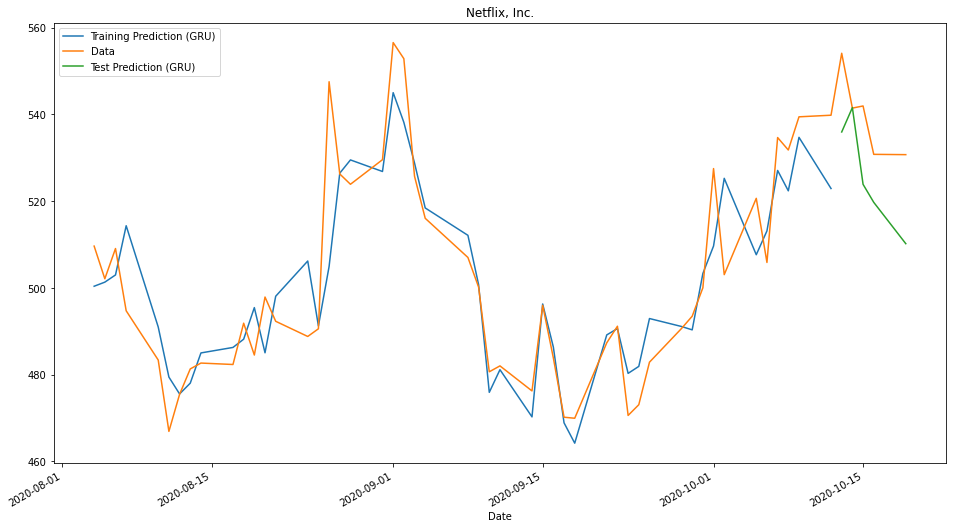

In [ ]:
# train_n_test.loc['2020-6-1':][['Test Prediction (GRU)', 'Data']].plot(figsize=(16, 9), title=stock_name)
train_n_test.loc['2020-8-4':].plot(figsize=(16, 9), title=stock_name);

In [ ]:
# The beginning is shifted by lookback business days.
train_n_test.head(3)

,Training Prediction (GRU),Data,Test Prediction (GRU)
Date,,,
2020-01-30,353.482910,347.739990,NaN
2020-01-31,355.825592,345.089996,NaN
2020-02-03,352.539185,358.000000,NaN


In [ ]:
train_n_test.tail(3)

,Training Prediction (GRU),Data,Test Prediction (GRU)
Date,,,
2020-10-15,NaN,541.940002,523.879761
2020-10-16,NaN,530.789978,519.728577
2020-10-19,NaN,530.719971,510.198853


Predict for _ days in future:

In [ ]:
lookahead = 1
predictions_period = [y_test[-1][0]]
# We take last lookback window but first price and add last known price (y_tesl[-1]).
test_period = np.append(X_test[-1:, 1:, :], y_test[-1]).reshape(1, -1, 1)

for i in range(lookahead):
    prediction = model(torch.Tensor(test_period[:, i:]))
    predictions_period.append(prediction.item())
    test_period = np.append(test_period, prediction.item()).reshape(1, -1, 1)

print('Prices:', scaler.inverse_transform([predictions_period]).squeeze())
predictions_period

Prices: [530.7199707  513.62804041]


[0.79954198171361, 0.6668972969055176]

In [ ]:
test_period

array([[[0.33304873],
        [0.35221758],
        [0.4282722 ],
        [0.48857246],
        [0.51053526],
        [0.5613675 ],
        [0.77463056],
        [0.58488229],
        [0.72139254],
        [0.60668973],
        [0.83011901],
        [0.80784595],
        [0.8672152 ],
        [0.8700866 ],
        [0.98090908],
        [0.8828142 ],
        [0.88661685],
        [0.80008528],
        [0.79954198],
        [0.6668973 ]]])

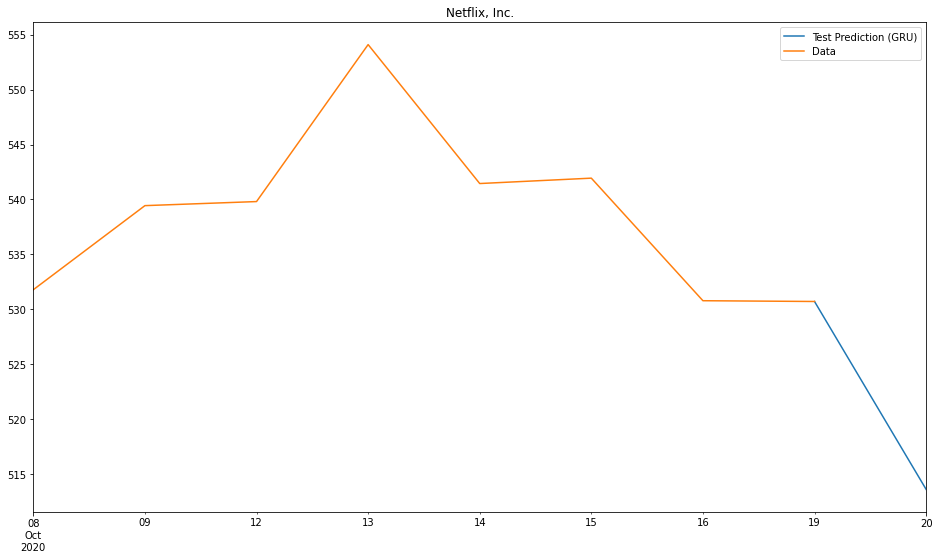

In [ ]:
SHOW_DAYS = 8
predict_test_period = pd.DataFrame({'Test Prediction (GRU)': scaler.inverse_transform([predictions_period]).squeeze()},
                                   index=pd.bdate_range(pd.Timestamp(price.iloc[-2:, :].index.date[0] + pd.tseries.offsets.BDay()), periods=lookahead+1)) \
                            .join(pd.DataFrame({'Data': scaler.inverse_transform(price.iloc[-SHOW_DAYS:]).squeeze()},
                                               index=price.iloc[-SHOW_DAYS:].index),
                                  how='outer')

predict_test_period.plot(figsize=(16, 9), title=stock_name);

In [ ]:
predict_test_period

,Test Prediction (GRU),Data
2020-10-08,NaN,531.789978
2020-10-09,NaN,539.440002
2020-10-12,NaN,539.809998
2020-10-13,NaN,554.090027
2020-10-14,NaN,541.450012
2020-10-15,NaN,541.940002
2020-10-16,NaN,530.789978
2020-10-19,530.719971,530.719971
2020-10-20,513.628040,NaN
